<a href="https://colab.research.google.com/github/Tunainvader/Projekt/blob/main/projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np


In [ ]:

from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,1,0,4,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,1,0,6,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,1,1,7,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,1,0,7,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,0,0,8,1


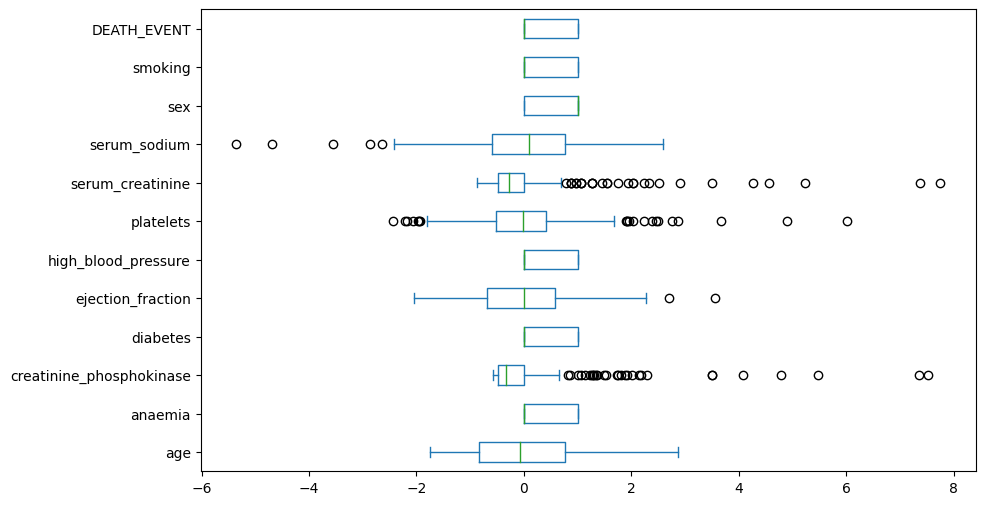

In [ ]:
# prompt: boxplot horizontal  exclude time feature

import matplotlib.pyplot as plt
df_exclude_time = df.drop('time', axis=1)
df_exclude_time.plot(kind='box', vert=False, figsize=(10, 6))
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


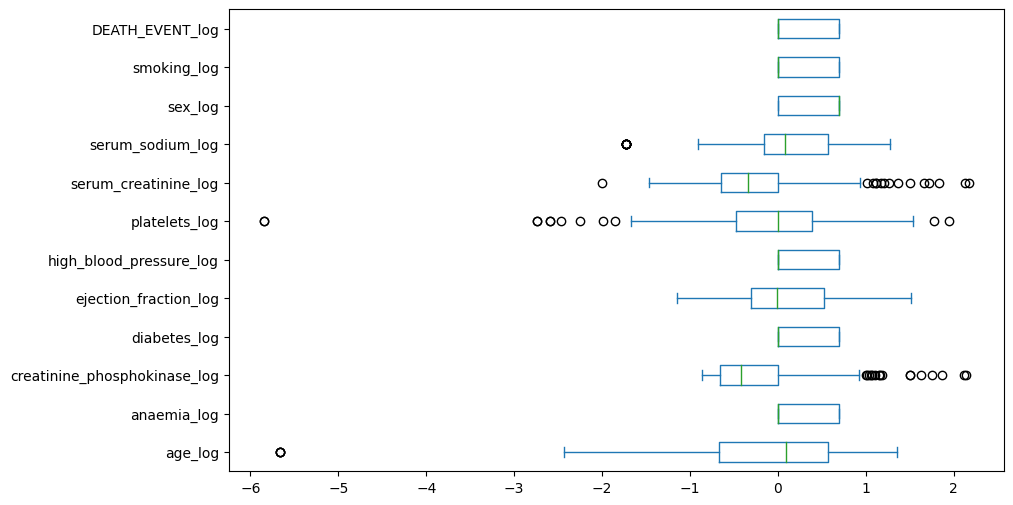

In [ ]:
# prompt: log transform the data

import matplotlib.pyplot as plt
import numpy as np
# Log transform the numerical features
numerical_features = df_exclude_time.select_dtypes(include=np.number).columns
for feature in numerical_features:
  df_exclude_time[feature + '_log'] = np.log(df_exclude_time[feature] + 1)  # Add 1 to avoid log(0)


# Now you can plot the log-transformed data if you wish
df_exclude_time[[col for col in df_exclude_time.columns if '_log' in col]].plot(kind='box', vert=False, figsize=(10, 6))
plt.show()


In [ ]:
# prompt: normalize the data

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Print the normalized data
print(df_normalized)


          age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    0.636364      0.0                  0.071319       0.0           0.090909   
1    0.272727      0.0                  1.000000       0.0           0.363636   
2    0.454545      0.0                  0.015693       0.0           0.090909   
3    0.181818      1.0                  0.011227       0.0           0.090909   
4    0.454545      1.0                  0.017479       1.0           0.090909   
..        ...      ...                       ...       ...                ...   
294  0.400000      0.0                  0.004848       1.0           0.363636   
295  0.272727      0.0                  0.229268       0.0           0.363636   
296  0.090909      0.0                  0.259888       1.0           0.696970   
297  0.090909      0.0                  0.304925       0.0           0.363636   
298  0.181818      0.0                  0.022072       0.0           0.469697   

     high_blood_pressure  p

In [ ]:
# prompt: StandardScaler (z-score standardization)

from sklearn.preprocessing import StandardScaler

# Select the numerical features you want to scale
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Print the scaled DataFrame
print(df.head())


        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  1.192945        0                  0.000166         0          -1.530560   
1 -0.491279        0                  7.514640         0          -0.007077   
2  0.350833        0                 -0.449939         0          -1.530560   
3 -0.912335        1                 -0.486071         0          -1.530560   
4  0.350833        1                 -0.435486         1          -1.530560   

   high_blood_pressure     platelets  serum_creatinine  serum_sodium  sex  \
0                    1  1.681648e-02          0.490057     -1.504036    1   
1                    0  7.535660e-09         -0.284552     -0.141976    1   
2                    0 -1.038073e+00         -0.090900     -1.731046    1   
3                    0 -5.464741e-01          0.490057      0.085034    1   
4                    0  6.517986e-01          1.264666     -4.682176    0   

   smoking  time  DEATH_EVENT  
0        0     4            1 

# prompt: Using dataframe df: boxplot the data exclude time, vertical

import seaborn as sns
import matplotlib.pyplot as plt

# Exclude 'time' column
df_for_boxplot = df.drop('time', axis=1)

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_for_boxplot, orient='h')  # Vertical orientation
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Boxplot of Data (excluding time)')
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


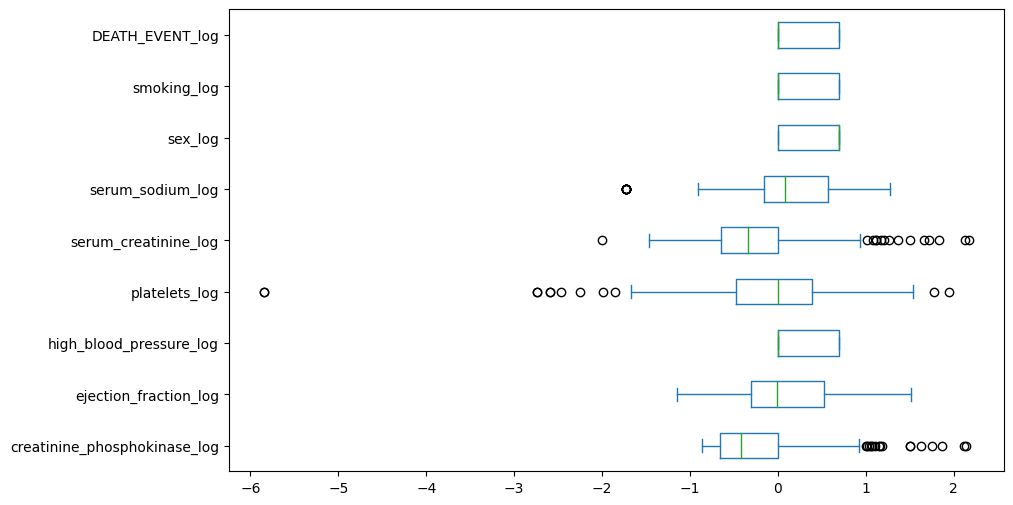

In [ ]:
# prompt: remove skewness in data

import matplotlib.pyplot as plt
import numpy as np
# Identify skewed features
skewed_features = df_exclude_time.skew()
skewed_features = skewed_features[abs(skewed_features) > 0.5]  # Consider features with skewness greater than 0.5

# Apply transformations to reduce skewness
for feature in skewed_features.index:
  # Log transformation
  df_exclude_time[feature + '_log'] = np.log1p(df_exclude_time[feature])  # Log transformation


# plotting the log-transformed features
df_exclude_time[[col for col in df_exclude_time.columns if '_log' in col]].plot(kind='box', vert=False, figsize=(10, 6))
plt.show()



In [ ]:
# prompt: apply linear regression to data

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separate features (X) and target variable (y)
X = df.drop('DEATH_EVENT', axis=1)  # Assuming 'DEATH_EVENT' is your target variable
y = df['DEATH_EVENT']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Mean Squared Error: 0.17868807219099941
R-squared: 0.2648262172713167


In [ ]:
# prompt: Decision Tree on data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred))


Accuracy: 0.6166666666666667
              precision    recall  f1-score   support

           0       0.64      0.77      0.70        35
           1       0.56      0.40      0.47        25

    accuracy                           0.62        60
   macro avg       0.60      0.59      0.58        60
weighted avg       0.61      0.62      0.60        60



In [ ]:
# prompt: k-Nearest Neighbors on the data

from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        35
           1       0.87      0.52      0.65        25

    accuracy                           0.77        60
   macro avg       0.80      0.73      0.74        60
weighted avg       0.79      0.77      0.75        60



In [ ]:
# prompt: Mann–Whitney U test  to compare the distribution of each feature between the two groups (survived individuals and dead patients), plus the Shapiro–Wilk test to check the distribution of each feature.

from scipy.stats import mannwhitneyu, shapiro

# Separate data into two groups based on DEATH_EVENT
survived_group = df[df['DEATH_EVENT'] == 0]
dead_group = df[df['DEATH_EVENT'] == 1]

# Perform Mann-Whitney U test and Shapiro-Wilk test for each feature
for feature in df.columns:
  if feature != 'DEATH_EVENT':
    # Shapiro-Wilk test for normality
    shapiro_stat_survived, shapiro_p_survived = shapiro(survived_group[feature])
    shapiro_stat_dead, shapiro_p_dead = shapiro(dead_group[feature])

    # Mann-Whitney U test
    u_statistic, p_value = mannwhitneyu(survived_group[feature], dead_group[feature])

    print(f"\nFeature: {feature}")
    print(f"  Shapiro-Wilk test (survived): Statistic={shapiro_stat_survived:.3f}, p-value={shapiro_p_survived:.3f}")
    print(f"  Shapiro-Wilk test (dead): Statistic={shapiro_stat_dead:.3f}, p-value={shapiro_p_dead:.3f}")
    print(f"  Mann-Whitney U test: U-statistic={u_statistic:.3f}, p-value={p_value:.3f}")

    # Interpret results (optional)
    if p_value < 0.05:
      print("  There is a statistically significant difference in the distribution of this feature between the two groups.")
    else:
      print("  There is no statistically significant difference in the distribution of this feature between the two groups.")



Feature: age
  Shapiro-Wilk test (survived): Statistic=0.980, p-value=0.005
  Shapiro-Wilk test (dead): Statistic=0.969, p-value=0.022
  Mann-Whitney U test: U-statistic=7121.000, p-value=0.000
  There is a statistically significant difference in the distribution of this feature between the two groups.

Feature: anaemia
  Shapiro-Wilk test (survived): Statistic=0.624, p-value=0.000
  Shapiro-Wilk test (dead): Statistic=0.636, p-value=0.000
  Mann-Whitney U test: U-statistic=9059.000, p-value=0.253
  There is no statistically significant difference in the distribution of this feature between the two groups.

Feature: creatinine_phosphokinase
  Shapiro-Wilk test (survived): Statistic=0.628, p-value=0.000
  Shapiro-Wilk test (dead): Statistic=0.439, p-value=0.000
  Mann-Whitney U test: U-statistic=9460.000, p-value=0.684
  There is no statistically significant difference in the distribution of this feature between the two groups.

Feature: diabetes
  Shapiro-Wilk test (survived): Statist

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Select features to cluster on (e.g., continuous variables like age, serum_creatinine, ejection_fraction)
features = heart_failure_data[['age', 'serum_creatinine', 'ejection_fraction', 'serum_sodium', 'platelets']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying K-Means with an optimal K (e.g., K=3 from the Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)


```
# This is formatted as code
```


# Add the cluster labels to the original data
heart_failure_data['Cluster'] = clusters

# Show the clustering results
print(heart_failure_data[['age', 'serum_creatinine', 'ejection_fraction', 'Cluster']].head())

# Evaluate the silhouette score for the clustering
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')


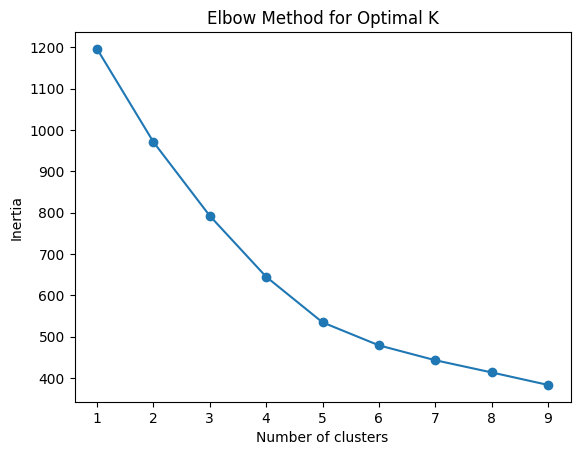

   serum_creatinine  ejection_fraction  serum_sodium       age  Cluster
0          0.490057          -1.530560     -1.504036  1.192945        0
1         -0.284552          -0.007077     -0.141976 -0.491279        0
2         -0.090900          -1.530560     -1.731046  0.350833        0
3          0.490057          -1.530560      0.085034 -0.912335        0
4          1.264666          -1.530560     -4.682176  0.350833        0
Silhouette Score: 0.23370172725560717


In [ ]:
# prompt: cluster the significant features and select the optimal number of clusters by plotting inertia (sum of squared distances to cluster centers) against the number of clusters.

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Select features to cluster on (e.g., continuous variables like age, serum_creatinine, ejection_fraction)
features = df[['serum_creatinine', 'ejection_fraction', 'serum_sodium','age']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Applying K-Means with an optimal K (e.g., K=3 from the Elbow method)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add the cluster labels to the original data
df['Cluster'] = clusters

# Show the clustering results
print(df[['serum_creatinine', 'ejection_fraction','serum_sodium','age', 'Cluster']].head())

# Evaluate the silhouette score for the clustering
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Cluster
0    0.316940
1    0.296296
2    0.750000
Name: DEATH_EVENT, dtype: float64


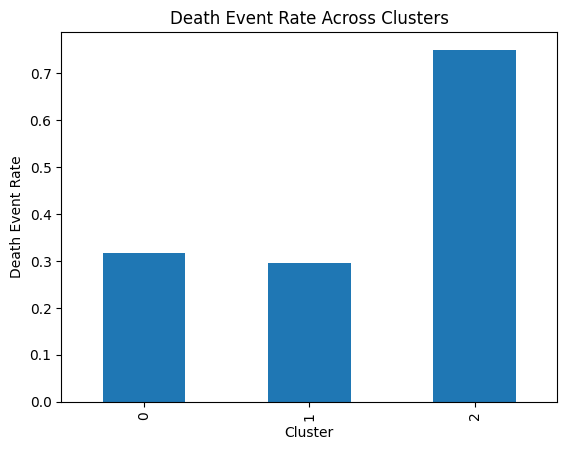

In [ ]:
# prompt: check distribution of death event across clusters

import matplotlib.pyplot as plt
# Group the data by cluster and calculate the death event rate
cluster_death_event_rates = df.groupby('Cluster')['DEATH_EVENT'].mean()

# Print the death event rates for each cluster
print(cluster_death_event_rates)

# You can also visualize this using a bar plot
cluster_death_event_rates.plot(kind='bar')
plt.title('Death Event Rate Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Death Event Rate')
plt.show()


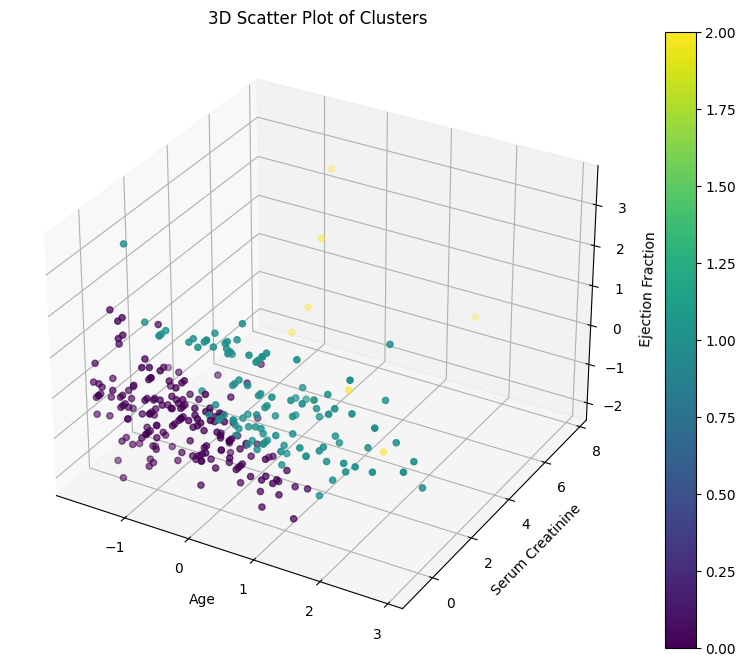

In [ ]:
# prompt: a 3d scatter plot of the clusters

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assuming you have 'age', 'serum_creatinine', and 'ejection_fraction' as features
# You can replace these with your chosen features for the 3D plot

scatter = ax.scatter(df['age'], df['serum_creatinine'], df['ejection_fraction'], c=df['Cluster'], cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Serum Creatinine')
ax.set_zlabel('Ejection Fraction')
ax.set_title('3D Scatter Plot of Clusters')

# Add a colorbar to show the mapping between cluster labels and colors
plt.colorbar(scatter)

plt.show()


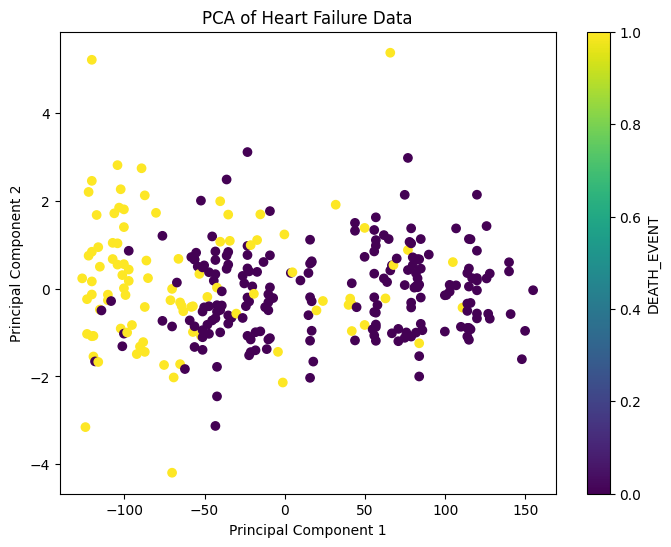

[9.98776266e-01 2.24481221e-04]


In [ ]:
# prompt: plot pca

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'X' contains your feature data (excluding the target variable)
X = df.drop('DEATH_EVENT', axis=1)

# Create a PCA object with the desired number of components (e.g., 2)
pca = PCA(n_components=2)

# Fit and transform the data
principal_components = pca.fit_transform(X)

# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=df['DEATH_EVENT'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Heart Failure Data')
plt.colorbar(label='DEATH_EVENT')
plt.show()

# Explained variance ratio
print(pca.explained_variance_ratio_)


In [ ]:
# prompt: using significant features apply random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Identify significant features based on your previous analysis (e.g., Mann-Whitney U test, feature importance from other models)
significant_features = ['ejection_fraction', 'serum_creatinine', 'age', 'serum_sodium']

# Create a new DataFrame with only significant features and the target variable
X = df[significant_features]
y = df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_rf))

# get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
for feature, importance in zip(significant_features, feature_importances):
  print(f"{feature}: {importance}")


Random Forest Accuracy: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.70      0.80      0.75        35
           1       0.65      0.52      0.58        25

    accuracy                           0.68        60
   macro avg       0.68      0.66      0.66        60
weighted avg       0.68      0.68      0.68        60

ejection_fraction: 0.25892844842011886
serum_creatinine: 0.3330643177809614
age: 0.23721262448678188
serum_sodium: 0.17079460931213775


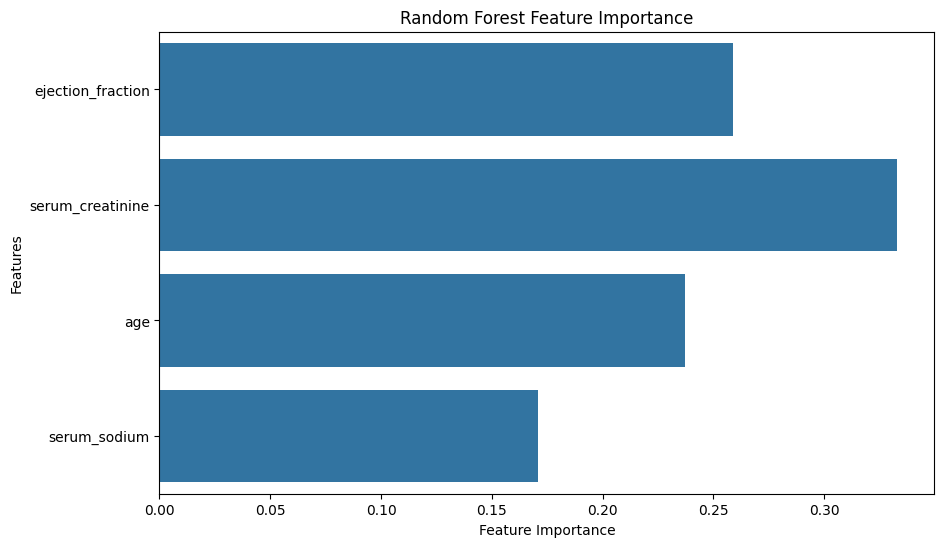

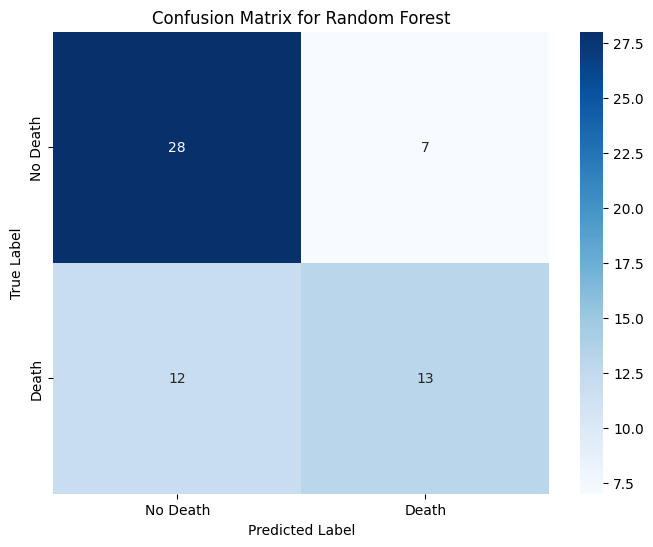

In [ ]:
# prompt: plot the random forest and a labelled confusion matrix  both

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the Random Forest Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=significant_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Death', 'Death'], yticklabels=['No Death', 'Death'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Interpreting Model Performance

Accuracy: The ratio of correctly predicted observations to the total observations. In this case, how well the model predicts whether the patient dies or survives.

Confusion Matrix:

True Positives (TP): Patients who died and were correctly predicted as dead.
True Negatives (TN): Patients who survived and were correctly predicted as survivors.
False Positives (FP): Patients who survived but were incorrectly predicted as dead.
False Negatives (FN): Patients who died but were incorrectly predicted as survivors.

Logistic Regression Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.64      0.91      0.75        35
           1       0.70      0.28      0.40        25

    accuracy                           0.65        60
   macro avg       0.67      0.60      0.58        60
weighted avg       0.67      0.65      0.61        60

Logistic Regression ROC AUC: 0.7337142857142857


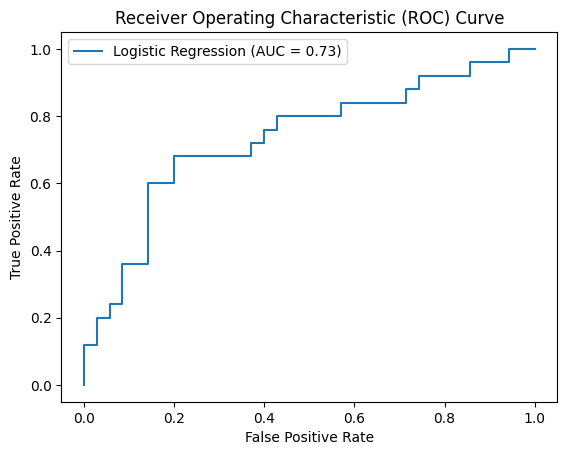

In [ ]:
# prompt: apply logistic regression to the features

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

# Assuming 'X' contains your feature data and 'y' contains your target variable
X = df[significant_features]
y = df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic}")

# Print a classification report for more detailed evaluation
print(classification_report(y_test, y_pred_logistic))


# Calculate the ROC AUC score
y_pred_proba_logistic = logistic_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
roc_auc_logistic = roc_auc_score(y_test, y_pred_proba_logistic)
print(f"Logistic Regression ROC AUC: {roc_auc_logistic}")

# Plot the ROC curve
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_proba_logistic)
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


